In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc("font", family="Malgun Gothic")

- seaborn 에서 제공해주는 tips 관련 데이터베이스

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [5]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [7]:
tips.groupby('day').count()['total_bill']

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

['Thur', 'Fri', 'Sat', 'Sun'] [62, 19, 87, 76]


<BarContainer object of 4 artists>

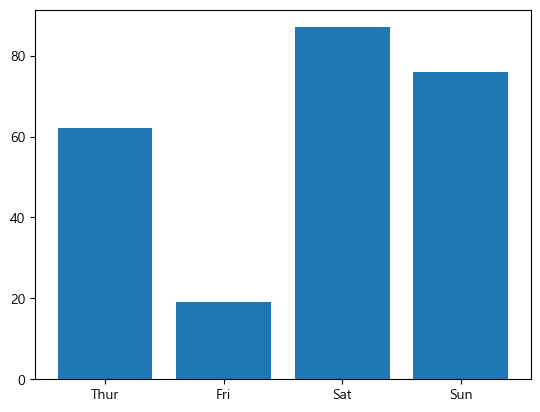

In [10]:
group = tips.groupby('day').count()['total_bill']
x = list(group.index)
y = list(group)
print(x, y)
plt.bar(x,y)

- seaborn 이용해서 나타내기 (palette 속성 사용하기)

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64
['Thur', 'Fri', 'Sat', 'Sun'] [1096.33, 325.88, 1778.4, 1627.16]


<Axes: >

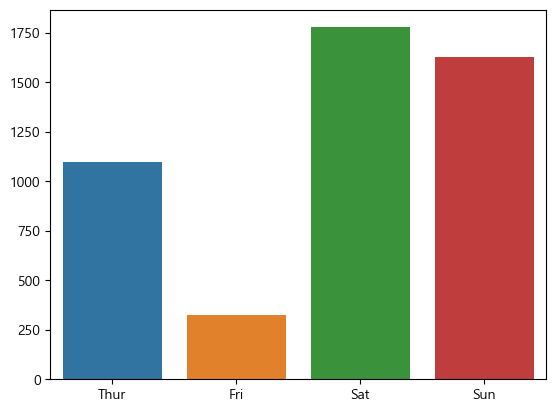

In [19]:
group = tips.groupby('day')['total_bill'].sum()
print( group )
x = list(group.index )
y = list(group )
print( x, y )
sns.barplot( x=x, y=y )

 - 색깔 지정 사이트
 https://seaborn.pydata.org/tutorial/color_palettes.html

In [21]:
tips.groupby('day').describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [26]:
tips.groupby('day').describe()['total_bill']['mean']

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: mean, dtype: float64

<Axes: xlabel='day'>

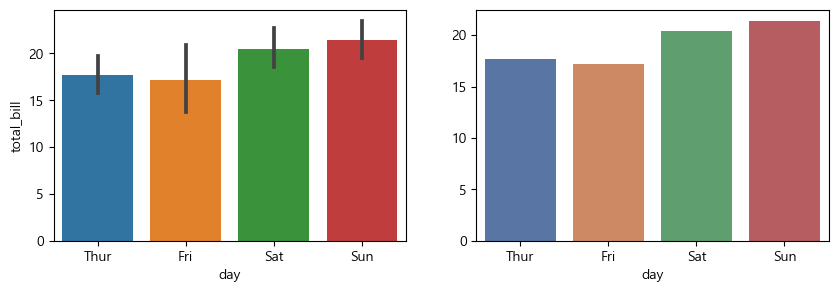

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.barplot(x='day', y='total_bill',data=tips, ax=axes[0])

data = tips.groupby('day').describe()['total_bill']['mean']
x_data = data.index
x_data
y_data = list(data)

sns.barplot(x=x_data, y=y_data, palette="deep", ax=axes[1])

### relplot

In [29]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


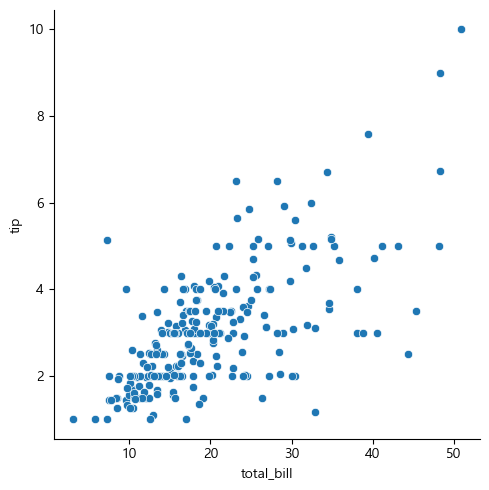

In [33]:
sns.relplot(x="total_bill", y="tip", data=tips)

- hue : 그룹으로 묶는다고 생각하면 됨

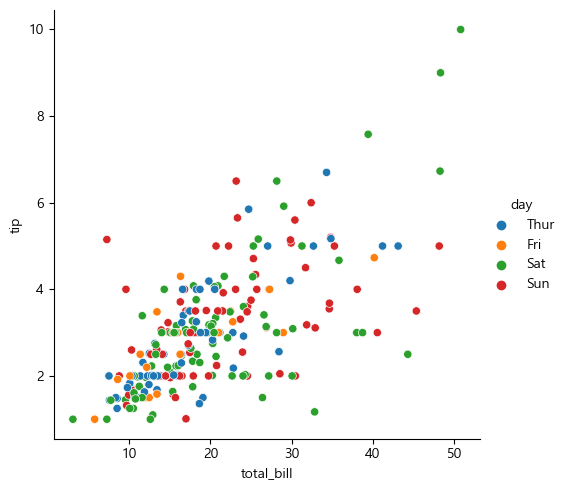

In [32]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

- col 속성 추가

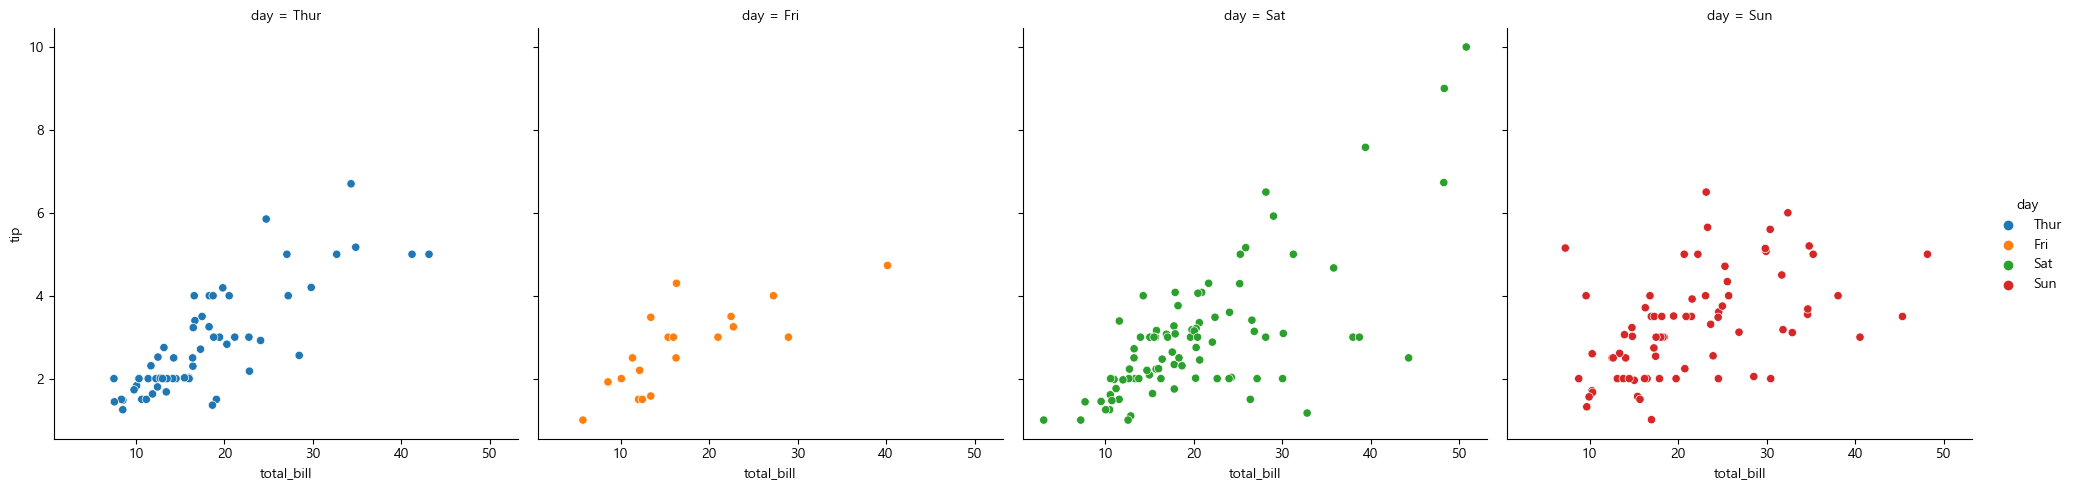

In [34]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, col="day")

- scatter 속성 사용

Text(0.5, 1.0, 'scatter plot')

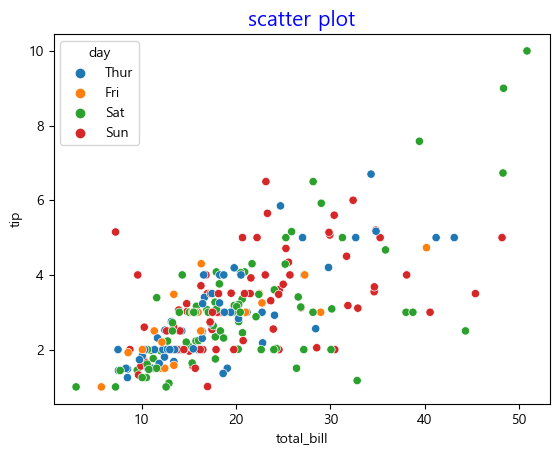

In [36]:
g = sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)
g.set_title("scatter plot", fontsize=15, color="blue")

- line 속성 사용

<Axes: xlabel='total_bill', ylabel='tip'>

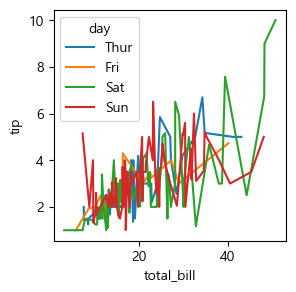

In [38]:
plt.subplots( figsize=(3,3))
sns.lineplot(x="total_bill", y="tip", hue="day", data=tips)

- titanic 데이터 가져와서 나타내기

In [39]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- distplot 속성 사용

Text(0.5, 1.0, 'DistPlot')

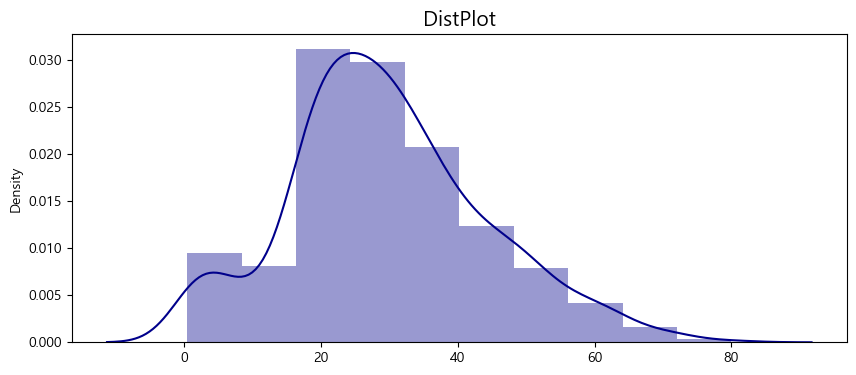

In [43]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.distplot(x=titanic['age'], color="darkblue", bins=10)
ax.set_title("DistPlot", fontsize=15)
#g, ax, plt

- histplot 속성 사용

Text(0.5, 1.0, 'histPlot')

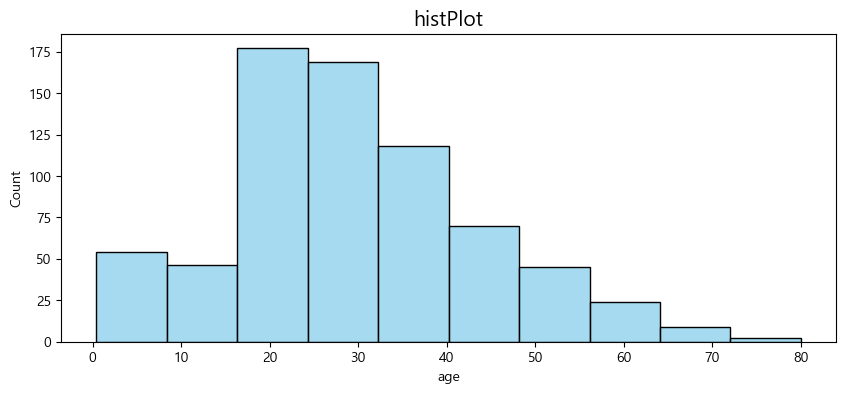

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.histplot(x=titanic['age'], color="skyblue", bins=10)
ax.set_title("histPlot", fontsize=15)

- boxplot 사용

<Axes: xlabel='day', ylabel='total_bill'>

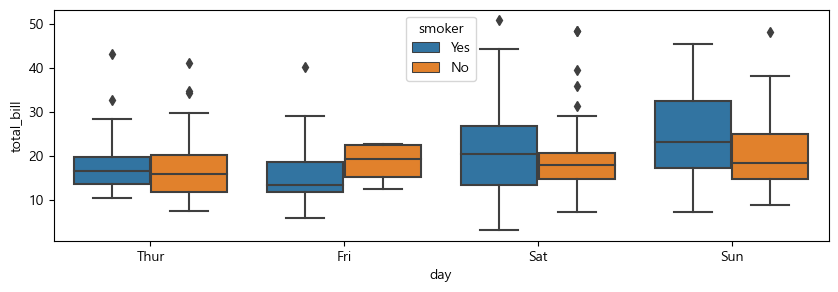

In [47]:
plt.subplots(figsize=(10,3))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

- 상관관계를 표현
    - 0.7 이상이면 어느정도 관계가 있다고 판단
    - 0.3 이하면 관계가 없다고 판단

In [49]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

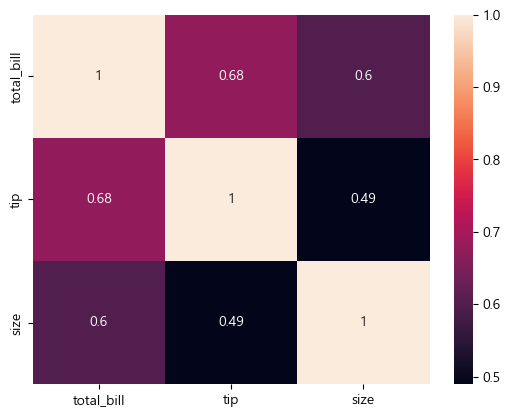

In [50]:
sns.heatmap(tips.corr(numeric_only=True), annot=True)